
**I) TÍNH TOÁN MA TRẬN TERM-DOCUMENT**

***1) TIỀN XỬ LÝ DỮ LIỆU***
- Tách câu với sent_tokenize
- Tách từ tiếng Anh với word_tokenize
- Lọc bỏ các từ stopword với danh sách stopword tiếng Anh
- Chuyển về dạng từ gốc với Porter stemmer

In [ ]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = '''experimental investigation of the aerodynamics of a wing in a slipstream . an experimental study of a wing in a propeller slipstream was made in order to determine the spanwise distribution of the lift increase due to slipstream at different angles of attack of the wing and at different free stream to slipstream velocity ratios .  the results were intended in part as an evaluation basis for different theoretical treatments of this problem . the comparative span loading curves, together with supporting evidence, showed that a substantial part of the lift increment produced by the slipstream was due to a /destalling/ or boundary layer control effect .  the integrated remaining lift increment, after subtracting this destalling lift, was found to agree well with a potential flow theory . an empirical evaluation of the destalling effects was made for the specific configuration of the experiment . '''
sents = sent_tokenize(text)
print(sents)

['experimental investigation of the aerodynamics of a wing in a slipstream .', 'an experimental study of a wing in a propeller slipstream was made in order to determine the spanwise distribution of the lift increase due to slipstream at different angles of attack of the wing and at different free stream to slipstream velocity ratios .', 'the results were intended in part as an evaluation basis for different theoretical treatments of this problem .', 'the comparative span loading curves, together with supporting evidence, showed that a substantial part of the lift increment produced by the slipstream was due to a /destalling/ or boundary layer control effect .', 'the integrated remaining lift increment, after subtracting this destalling lift, was found to agree well with a potential flow theory .', 'an empirical evaluation of the destalling effects was made for the specific configuration of the experiment .']


In [ ]:
words = word_tokenize(sents[0])
print(words)

['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'of', 'a', 'wing', 'in', 'a', 'slipstream', '.']


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stoplist = stopwords.words("english")
print(stoplist)
print(len(stoplist))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
filtered = []
for w in words:
  if w in stoplist:
    continue
  filtered.append(w)
print(filtered)

['experimental', 'investigation', 'aerodynamics', 'wing', 'slipstream', '.']


In [ ]:
tokens = []
for w in filtered:
  if w.isalnum():
    tokens.append(w)
print(tokens)

['experimental', 'investigation', 'aerodynamics', 'wing', 'slipstream']


In [ ]:
ps = PorterStemmer()
terms = []
for w in tokens:
  terms.append(ps.stem(w))
print(terms)

['experiment', 'investig', 'aerodynam', 'wing', 'slipstream']


VÍ DỤ MINH HỌA VIỆC TIỀN XỬ LÝ

Cho tập văn bản D={d1, d2, d3, d4, d5}

d1 = Romeo and Juliet

d2 = Juliet: Oh happy dagger

d3 = Romeo died by dagger

d4 = "live free or die" is from New-Hampshire

d5 = He is from New-Hampshire

In [ ]:
D = ['Romeo and Juliet', "Juliet: Oh happy dagger", "Romeo died by dagger", '"live free or die" is from New-Hampshire', "He is from New-Hampshire"]
q = "die dagger"

In [ ]:
puncts = ['.', ',', ':', '`', '"', "'", '!', '?', "``", "''"]
stoplist.append('oh')

In [ ]:
DD = []
for i in range(len(D)):
  sentences = sent_tokenize(D[i])
  terms = []
  for j in range(len(sentences)):
    toks = word_tokenize(sentences[j])
    for tok in toks:
      tok = tok.lower()
      if tok.isdigit():
        continue
      if tok.isnumeric():
        continue
      if tok in puncts:
        continue
      if tok in stoplist:
        continue
      terms.append(ps.stem(tok))
  DD.append(terms)
print(DD)

[['romeo', 'juliet'], ['juliet', 'happi', 'dagger'], ['romeo', 'die', 'dagger'], ['live', 'free', 'die', 'new-hampshir'], ['new-hampshir']]


***2) TẠO MA TRẬN TERM-DOCUMENT***

- Chọn term, mỗi term là một dòng trong ma trận
- Mỗi tài liệu là một cột trong ma trận
- Giá trị mỗi ô tùy thuộc vào phương pháp tính toán. Chẳng hạn, giá trị mỗi ô có thể là tần số của term trong tài liệu tương ứng.

***VÍ DỤ TẠO MA TRẬN TERM-DOCUMENT***

Các term được xác định là những từ còn lại sau khi tiền xử lý tập tài liệu D.

Giá trị mỗi ô là tần số của term trong tài liệu tương ứng.

In [ ]:
from nltk.probability import FreqDist
allterms = []
for itm in DD:
  allterms.extend(itm)
fd = FreqDist(allterms)
for key in fd.keys():
  print(key, fd[key])

romeo 2
juliet 2
happi 1
dagger 2
die 2
live 1
free 1
new-hampshir 2


In [ ]:
termdoc = []
keys = list(fd.keys())
for i in range(len(keys)):
  r = [0] * len(DD)
  termdoc.append(r)
for i in range(len(DD)):
  for w in DD[i]:
    for j in range(len(keys)):
      if keys[j] == w:
        termdoc[j][i] += 1
        break
print(termdoc)

[[1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1]]


**II) PHÂN TÍCH NGỮ NGHĨA TIỀM ẨN**

***1) TÁCH MA TRẬN VỚI SINGULAR VALUE DECOMPOSITION***

- Tạo ma trận term-document A
- Sử dụng hàm svd trong package numpy.linalg để tách ma trận A thành các ma trận S, Z và UT thỏa A = S.Z.UT.


In [ ]:
import numpy as np
from numpy.linalg import svd, norm
from numpy import dot


In [ ]:
S, Z, UT = svd(termdoc)
print(S)
print(Z)
print(UT)

[[-3.96152775e-01  2.80057367e-01 -5.71171321e-01  4.49684978e-01
  -1.01838799e-01  3.14548241e-01  3.14548241e-01  1.67108527e-01]
 [-3.14268061e-01  4.49532136e-01  4.10590545e-01  5.13018237e-01
   2.03906072e-01 -3.14548241e-01 -3.14548241e-01 -1.67108527e-01]
 [-1.78239520e-01  2.68991539e-01  4.97320521e-01 -2.56997782e-01
   4.30523318e-02  2.26566432e-01  2.26566432e-01  6.91361313e-01]
 [-4.38363755e-01  3.68508309e-01  1.28791752e-02 -5.77328823e-01
  -2.19640207e-01  8.79818089e-02  8.79818089e-02 -5.24252786e-01]
 [-5.24004819e-01 -2.46404656e-01 -3.38652269e-01 -2.72846164e-01
   1.54791485e-01 -4.02530050e-01 -4.02530050e-01  3.57144258e-01]
 [-2.63880584e-01 -3.45921426e-01  1.45789077e-01  4.74848765e-02
   4.17484024e-01  7.01265025e-01 -2.98734975e-01 -1.78572129e-01]
 [-2.63880584e-01 -3.45921426e-01  1.45789077e-01  4.74848765e-02
   4.17484024e-01 -2.98734975e-01  7.01265025e-01 -1.78572129e-01]
 [-3.26373224e-01 -4.59668780e-01  3.17002971e-01  2.37243804e-01
  -

In [ ]:
S2 = S[:,:2]
Z2 = np.diag(Z[:2])
UT2 = UT[:2,:]
print(S2)
print(Z2)
print(UT2)

[[-0.39615277  0.28005737]
 [-0.31426806  0.44953214]
 [-0.17823952  0.26899154]
 [-0.43836375  0.36850831]
 [-0.52400482 -0.24640466]
 [-0.26388058 -0.34592143]
 [-0.26388058 -0.34592143]
 [-0.32637322 -0.45966878]]
[[2.28529793 0.        ]
 [0.         2.01025824]]
[[-0.31086574 -0.40733041 -0.59446137 -0.60304575 -0.1428143 ]
 [ 0.36293322  0.54074246  0.20005441 -0.6953914  -0.22866156]]


***2) BIỂU DIỄN TERM VÀ DOCUMENT THEO KHÔNG GIAN MỚI***

- Tập vector term là K = S.Z
- Tập vector document là D = Z.UT


In [ ]:
K = S2.dot(Z2)
D = Z2.dot(UT2)
print(K)
print(D)

[[-0.90532712  0.56298763]
 [-0.71819615  0.90367568]
 [-0.40733041  0.54074246]
 [-1.00179178  0.74079687]
 [-1.19750713 -0.49533699]
 [-0.60304575 -0.6953914 ]
 [-0.60304575 -0.6953914 ]
 [-0.74586005 -0.92405295]]
[[-0.71042084 -0.93087134 -1.35852135 -1.37813921 -0.32637322]
 [ 0.7295895   1.08703198  0.40216102 -1.39791629 -0.45966878]]


In [ ]:
Xk = K[:,:1]
Xk = Xk.transpose()
Xk = Xk.squeeze()
Yk = K[:,1:]
Yk = Yk.transpose()
Yk = Yk.squeeze()
print(keys)
print(Xk)
print(Yk)

['romeo', 'juliet', 'happi', 'dagger', 'die', 'live', 'free', 'new-hampshir']
[-0.90532712 -0.71819615 -0.40733041 -1.00179178 -1.19750713 -0.60304575
 -0.60304575 -0.74586005]
[ 0.56298763  0.90367568  0.54074246  0.74079687 -0.49533699 -0.6953914
 -0.6953914  -0.92405295]


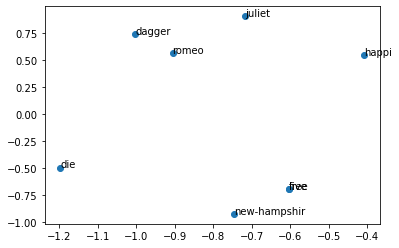

In [ ]:
from nltk.util import in_idle
from io import IncrementalNewlineDecoder
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(Xk, Yk, 'o')
for i in range(len(keys)):
  ax.annotate(keys[i], xy=(Xk[i], Yk[i]), textcoords='data')
plt.show()

In [ ]:
Vq = (K[3] + K[4]) / 2
print(K[3])
print(K[4])
print(Vq)

[-1.00179178  0.74079687]
[-1.19750713 -0.49533699]
[-1.09964945  0.12272994]


***3) TÍNH TOÁN ĐỘ TƯƠNG ĐỒNG GIỮA TÀI LIỆU VÀ TRUY VẤN***

- Tính vector truy vấn là trung bình của các vector term có trong truy vấn.

- Tính khoảng cách cosine từ vector truy vấn đến từng vector tài liệu.

- Xếp tài liệu theo thứ tự giảm dần của khoảng cách cosine.


In [ ]:
D = D.transpose()
scores = []
for d in D:
  scores.append(dot(Vq, d)/norm(Vq)/norm(d))
print(scores)

[0.7727964887537563, 0.7306768205359736, 0.9844359912676066, 0.6187306127613204, 0.48491831850738076]


**III - STANZA (STANFORD CORENLP)**

STANZA là phiên bản wrap của stanford corenlp trên Python. Stanza có thể được dùng để nhận dạng ranh giới câu, tách từ, gán nhãn từ loại, phân tích cú pháp cấu trúc ngữ đoạn và phân tích cú pháp phụ thuộc. Kết quả xử lý được đặt trong một đối tượng để từ đó truy xuất đến từng kết quả như mong muốn.

***1) Cài đặt stanza***

In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 7.4 MB/s 
     |████████████████████████████████| 240 kB 30.7 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=35d541eff20dc09baf0409be84b5ea8301d6229c28bfb939f78574737ee83e21
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


***2) Khởi tạo đối tượng Pipeline***

Đối tượng Pipeline có nhiệm vụ thực hiện các tác vụ đã được nêu ở trên. Pipeline có thể cài đặt cho một số ngôn ngữ, chẳng hạn tiếng Anh (chưa có tiếng Việt).

Lưu ý, đối tượng Pipeline chỉ nên khởi tạo một lần, đối tượng này sẽ được sử dụng để xử lý khi cần.

In [ ]:
import stanza
stanza.download('en')#, proxies=proxies)
nlp = stanza.Pipeline('en')

INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: constituency
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


***3) Xử lý với đối tượng Pipeline***

Truyền một đoạn hoặc một văn bản cho đối tượng Pipeline. Kết quả là một tài liệu đã được xử lý gồm các câu.

In [ ]:
doc = nlp("I have a book.  It is an exellent book.")

Dùng thuộc tính constituency để lấy kết quả phân tích cú pháp cấu trúc ngữ đoạn

In [ ]:
doc.sentences[0].constituency

(ROOT (S (NP (PRP I)) (VP (VBP have) (NP (DT a) (NN book))) (. .)))

Dùng thuộc tính dependencies để lấy kết quả phân tích cú pháp phụ thuộc

In [ ]:
doc.sentences[0].dependencies

[({
    "id": 2,
    "text": "have",
    "lemma": "have",
    "upos": "VERB",
    "xpos": "VBP",
    "feats": "Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "start_char": 2,
    "end_char": 6
  }, 'nsubj', {
    "id": 1,
    "text": "I",
    "lemma": "I",
    "upos": "PRON",
    "xpos": "PRP",
    "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
    "head": 2,
    "deprel": "nsubj",
    "start_char": 0,
    "end_char": 1
  }), ({
    "id": 0,
    "text": "ROOT"
  }, 'root', {
    "id": 2,
    "text": "have",
    "lemma": "have",
    "upos": "VERB",
    "xpos": "VBP",
    "feats": "Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "start_char": 2,
    "end_char": 6
  }), ({
    "id": 4,
    "text": "book",
    "lemma": "book",
    "upos": "NOUN",
    "xpos": "NN",
    "feats": "Number=Sing",
    "head": 2,
    "deprel": "obj",
    "start_char": 9,
    "end_char": 13
  }, 'det', {
    

Mỗi câu có nhiều từ, để truy xuất đến từ, từ gốc và nhãn từ loại thì dùng các thuộc tính text, lemma và xpos

In [ ]:
for word in doc.sentences[0].words:
  print(word.text, word.lemma, word.xpos)


I I PRP
have have VBP
a a DT
book book NN
. . .


**IV - PY-VNCORENLP (VNCORENLP)**

PY-VNCORENLP là phiên bản wrap của vncorenlp trên Python. Py-vncorenlp có thể được dùng để nhận dạng ranh giới câu, tách từ, gán nhãn từ loại và phân tích cú pháp phụ thuộc. Kết quả xử lý được đặt trong một đối tượng để từ đó truy xuất đến từng kết quả như mong muốn.

***1) Cài đặt py-vncorenlp***

In [ ]:
!pip install py-vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.7 MB/s 
  Created wheel for py-vncorenlp: filename=py_vncorenlp-0.1.3-py3-none-any.whl size=4307 sha256=29d30fc4ee6d1fbe1caf1e9469aa80c83356ee7b0a9dac222ebe5da86c241669
  Stored in directory: /root/.cache/pip/wheels/d7/73/13/6b1f2c14831151fc1417f3dc1fa6b241e27ad13f8c83691753
Successfully built py-vncorenlp


***2) Khởi tạo đối tượng VnCoreNLP***

Đối tượng VnCoreNLP có nhiệm vụ thực hiện các tác vụ đã được nêu ở trên. 

Lưu ý, đối tượng VnCoreNLP chỉ được khởi tạo một lần. Nếu khởi tạo một lần nữa sẽ bị lỗi do đối tượng trước đã chiếm dụng tài nguyên của máy, đối tượng sau sẽ không được tạo.

In [ ]:
import py_vncorenlp
py_vncorenlp.download_model(save_dir='./')
model = py_vncorenlp.VnCoreNLP(annotators=["wseg", "pos", "ner", "parse"], save_dir='./')

***3) Xử lý với đối tượng VnCoreNLP***

Truyền một đoạn hoặc một văn bản cho đối tượng VnCoreNLP. Kết quả là một tài liệu đã được xử lý gồm các câu.

In [ ]:
sentences = model.annotate_text("Tôi có một quyển sách. Đó là quyển sách rất hay")

Kết quả xử lý kết quả phân tích cú pháp phụ thuộc của các câu.

In [ ]:
sentences[0]

[{'index': 1,
  'wordForm': 'Tôi',
  'posTag': 'P',
  'nerLabel': 'O',
  'head': 2,
  'depLabel': 'sub'},
 {'index': 2,
  'wordForm': 'có',
  'posTag': 'V',
  'nerLabel': 'O',
  'head': 0,
  'depLabel': 'root'},
 {'index': 3,
  'wordForm': 'một',
  'posTag': 'M',
  'nerLabel': 'O',
  'head': 4,
  'depLabel': 'det'},
 {'index': 4,
  'wordForm': 'quyển',
  'posTag': 'Nc',
  'nerLabel': 'O',
  'head': 2,
  'depLabel': 'dob'},
 {'index': 5,
  'wordForm': 'sách',
  'posTag': 'N',
  'nerLabel': 'O',
  'head': 4,
  'depLabel': 'nmod'},
 {'index': 6,
  'wordForm': '.',
  'posTag': 'CH',
  'nerLabel': 'O',
  'head': 2,
  'depLabel': 'punct'}]

Mỗi câu gồm nhiều từ. Với mỗi từ, Dùng key 'wordForm' và 'posTag' để xác định biểu diễn từ đã được tách và nhãn từ loại của nó

In [ ]:
sent = sentences[0]
for word in sent:
  print(word['wordForm'], word['posTag'])

Tôi P
có V
một M
quyển Nc
sách N
. CH


**V PHÂN LỚP VĂN BẢN**

1) Cài đặt package scikit-learn

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2) Sử dụng lớp Support Vector Classification (SVC) 
- Khai báo sử dụng SVC trong package sklearn.svm
- Tạo đối tượng của lớp SVC các tham số cần lưu ý gồm C, kernel và tol
- Chuẩn bị dữ liệu huấn luyện gồm 2 phần, X là tập giá trị đặc trưng, mỗi X[i] là một bộ, có dạng vector n chiều; Y là tập các nhãn tương ứng với mỗi bộ X[i]

In [ ]:
from sklearn.svm import SVC

Ví dụ: Cho 4 tài liệu đã được phân lớp như sau:

1) Chinese Beijing Chinese (China - 0)

2) Chinese Chinese Shanghai (China - 0)

3) Chinese Macao (China - 0)

4) Tokyo Japan Chinese (Japan - 1)

Cho biết tài liệu sau thuộc lớp nào?

5) Chinese Chinese Chinese Tokyo Japan

In [ ]:

from sklearn.datasets import load_iris

V = {'chinese', 'beijing', 'shanghai', 'macao', 'tokyo', 'japan'}
d1= [2,1,0,0,0,0]
d2= [2,0,1,0,0,0]
d3= [1,0,0,1,0,0]
d4= [1,0,0,0,1,1]
d5= [3,0,0,0,1,1]
y1= 0
y2= 0
y3= 0
y4= 1

X = [d1, d2, d3, d4]
Y = [y1, y2, y3, y4]

#kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier = SVC(C=2, kernel = "rbf",tol=0.5)
classifier.fit(X,Y)
classifier.predict([d5])

array([0])